In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
agency = pd.read_csv(r"C:\Users\Asus\Downloads\METRO FILES\agency.txt")
calendar = pd.read_csv(r"C:\Users\Asus\Downloads\METRO FILES\calendar.txt")
stops = pd.read_csv(r"C:\Users\Asus\Downloads\METRO FILES\stops.txt")
trips = pd.read_csv(r"C:\Users\Asus\Downloads\METRO FILES\trips.txt")
stop_times = pd.read_csv(r"C:\Users\Asus\Downloads\METRO FILES\stop_times.txt")
routes = pd.read_csv(r"C:\Users\Asus\Downloads\METRO FILES\routes.txt")  
shapes = pd.read_csv(r"C:\Users\Asus\Downloads\METRO FILES\shapes.txt")  


In [24]:
# Display the first few rows of each DataFrame
print(agency.head())
print(calendar.head())
print(stops.head())
print(trips.head())
print(stop_times.head())
print(routes.head())


  agency_id                   agency_name                      agency_url  \
0      DMRC  Delhi Metro Rail Corporation  http://www.delhimetrorail.com/   

  agency_timezone  agency_lang  agency_phone  agency_fare_url  agency_email  
0    Asia/Kolkata          NaN           NaN              NaN           NaN  
  service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
0    weekday       1        1          1         1       1         0       0   
1   saturday       0        0          0         0       0         1       0   
2     sunday       0        0          0         0       0         0       1   

   start_date  end_date  
0    20190101  20251231  
1    20190101  20251231  
2    20190101  20251231  
   stop_id  stop_code       stop_name  stop_desc   stop_lat   stop_lon
0        1        NaN  Dilshad Garden        NaN  28.675991  77.321495
1        2        NaN         Jhilmil        NaN  28.675648  77.312393
2        3        NaN  Mansrover park        NaN  2

In [25]:
#Display the shape of each DataFrame
print("Agency shape:", agency.shape)
print("Calendar shape:", calendar.shape)
print("Stops shape:", stops.shape)
print("Trips shape:", trips.shape)
print("Stop Times shape:", stop_times.shape)
print("Routes shape:", routes.shape)

Agency shape: (1, 8)
Calendar shape: (3, 10)
Stops shape: (262, 6)
Trips shape: (5438, 10)
Stop Times shape: (128434, 12)
Routes shape: (36, 12)


In [26]:
# Display the data types of each DataFrame
print("Agency dtypes:\n", agency.dtypes)
print("Calendar dtypes:\n", calendar.dtypes)
print("Stops dtypes:\n", stops.dtypes)
print("Trips dtypes:\n", trips.dtypes)
print("Stop Times dtypes:\n", stop_times.dtypes)
print("Routes dtypes:\n", routes.dtypes)

Agency dtypes:
 agency_id           object
agency_name         object
agency_url          object
agency_timezone     object
agency_lang        float64
agency_phone       float64
agency_fare_url    float64
agency_email       float64
dtype: object
Calendar dtypes:
 service_id    object
monday         int64
tuesday        int64
wednesday      int64
thursday       int64
friday         int64
saturday       int64
sunday         int64
start_date     int64
end_date       int64
dtype: object
Stops dtypes:
 stop_id        int64
stop_code    float64
stop_name     object
stop_desc    float64
stop_lat     float64
stop_lon     float64
dtype: object
Trips dtypes:
 route_id                   int64
service_id                object
trip_id                    int64
trip_headsign            float64
trip_short_name          float64
direction_id             float64
block_id                 float64
shape_id                  object
wheelchair_accessible      int64
bikes_allowed              int64
dtype: objec

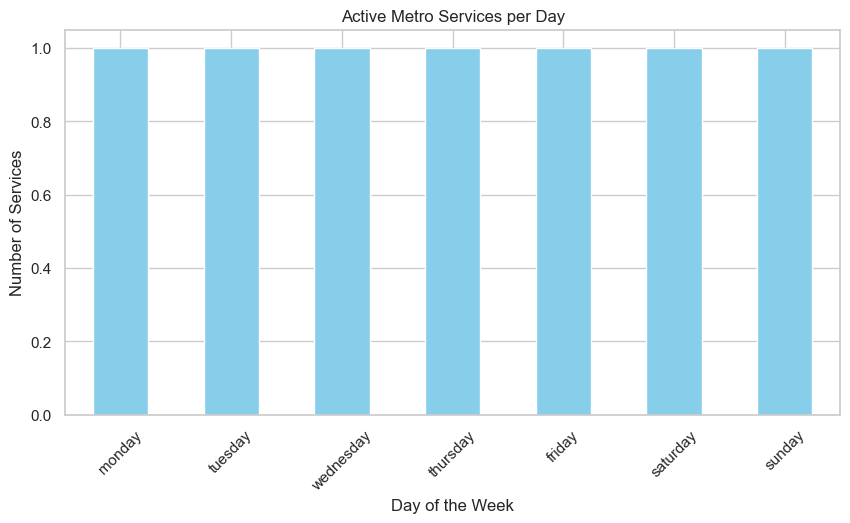

In [27]:
# No. of services per day
service_days = calendar[['monday','tuesday','wednesday','thursday','friday','saturday','sunday']].sum()
plt.figure(figsize=(10, 5))
service_days.plot(kind='bar', color='skyblue')
plt.title('Active Metro Services per Day')
plt.ylabel('Number of Services')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

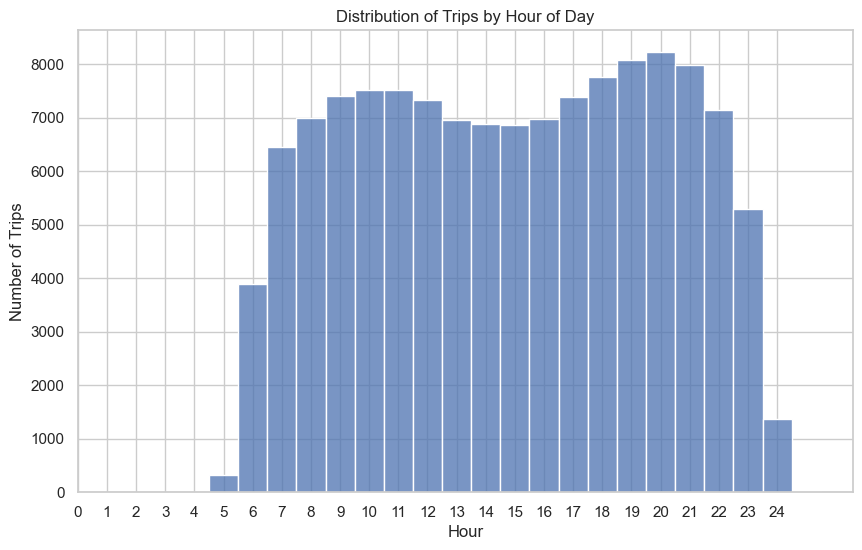

In [28]:
# Distribution of trips by hours per day    
stop_times['arrival_hour'] = stop_times['arrival_time'].apply(lambda x: int(x.split(':')[0]) if isinstance(x, str) else None)
plt.figure(figsize=(10, 6))
sns.histplot(stop_times['arrival_hour'].dropna(), bins=24, discrete=True)
plt.title('Distribution of Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 25))
plt.show()

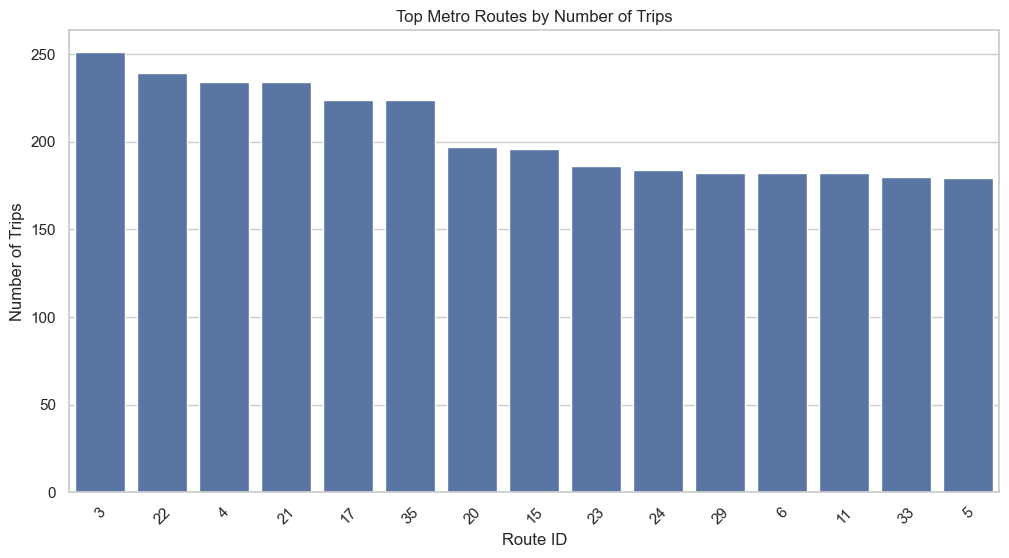

In [29]:
# Top Routes by Number of Trips
top_routes = trips['route_id'].value_counts().nlargest(15).index
plt.figure(figsize=(12, 6))
sns.countplot(data=trips[trips['route_id'].isin(top_routes)], x='route_id', order=top_routes)
plt.title('Top Metro Routes by Number of Trips')
plt.xlabel('Route ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

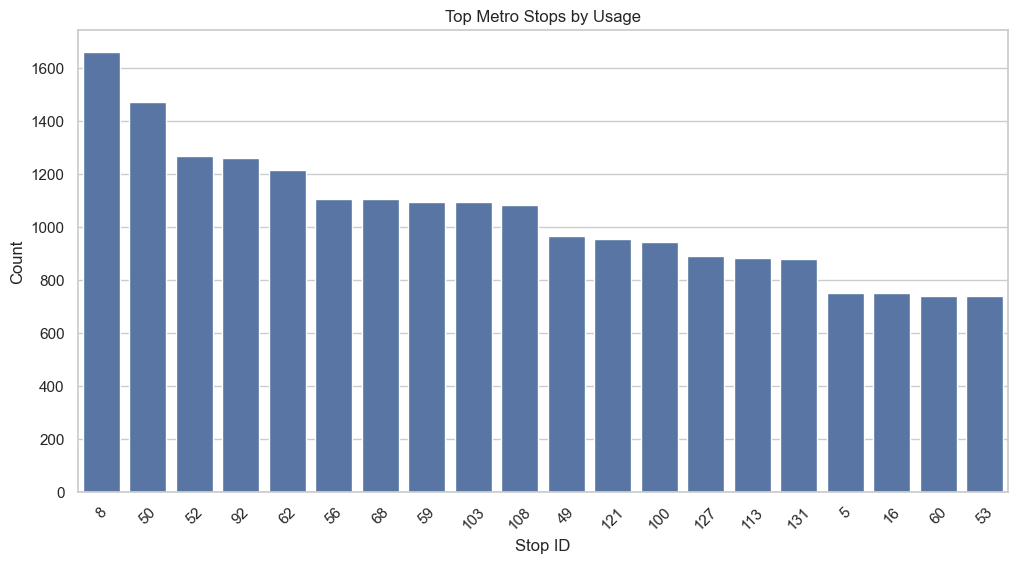

In [30]:
# Top Metro Stops
top_stops = stop_times['stop_id'].value_counts().nlargest(20).index
plt.figure(figsize=(12, 6))
sns.countplot(data=stop_times[stop_times['stop_id'].isin(top_stops)], x='stop_id', order=top_stops)
plt.title('Top Metro Stops by Usage')
plt.xlabel('Stop ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

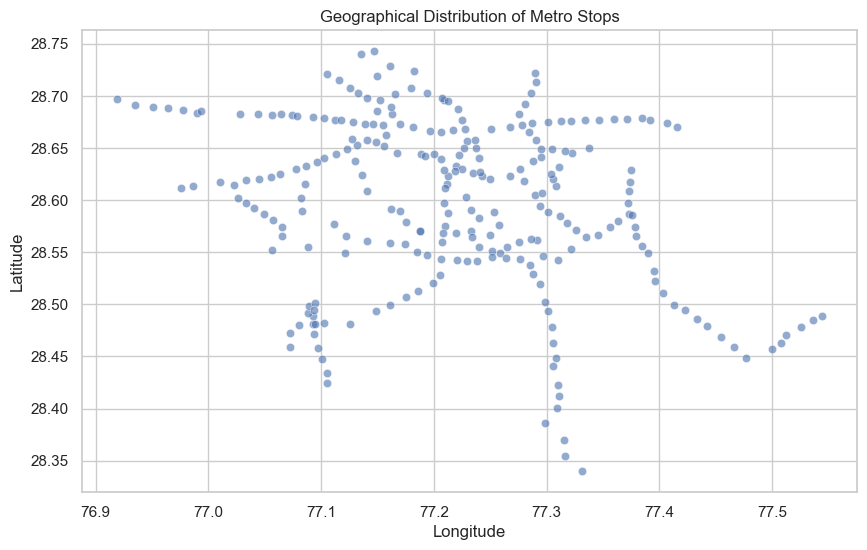

In [31]:
# Geographical Distribution of Metro Stops
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stops, x='stop_lon', y='stop_lat', alpha=0.6)
plt.title('Geographical Distribution of Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

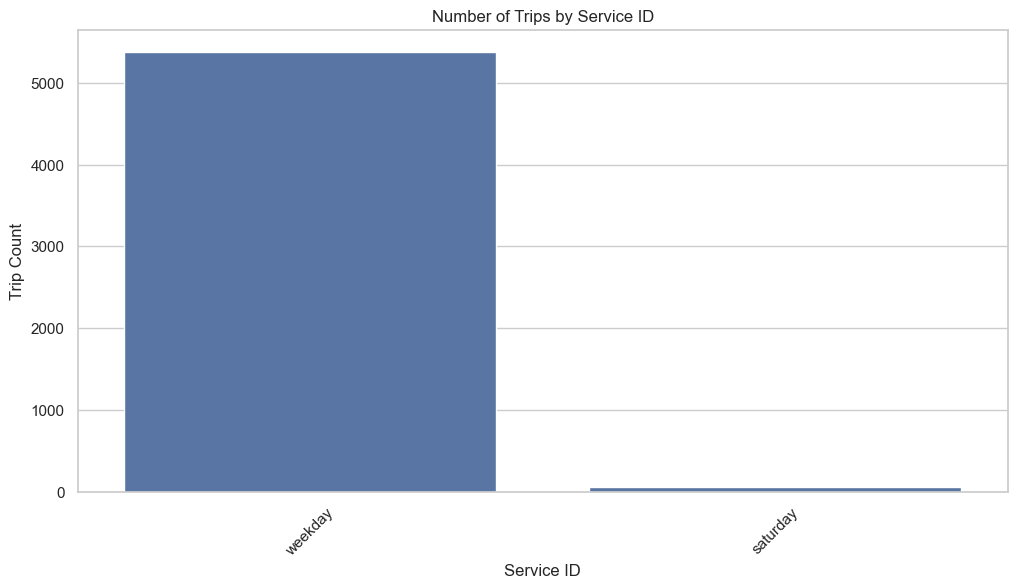

In [32]:
# Number of Trips by Service ID
plt.figure(figsize=(12, 6))
sns.countplot(data=trips, x='service_id', order=trips['service_id'].value_counts().index)
plt.title('Number of Trips by Service ID')
plt.xlabel('Service ID')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.show()


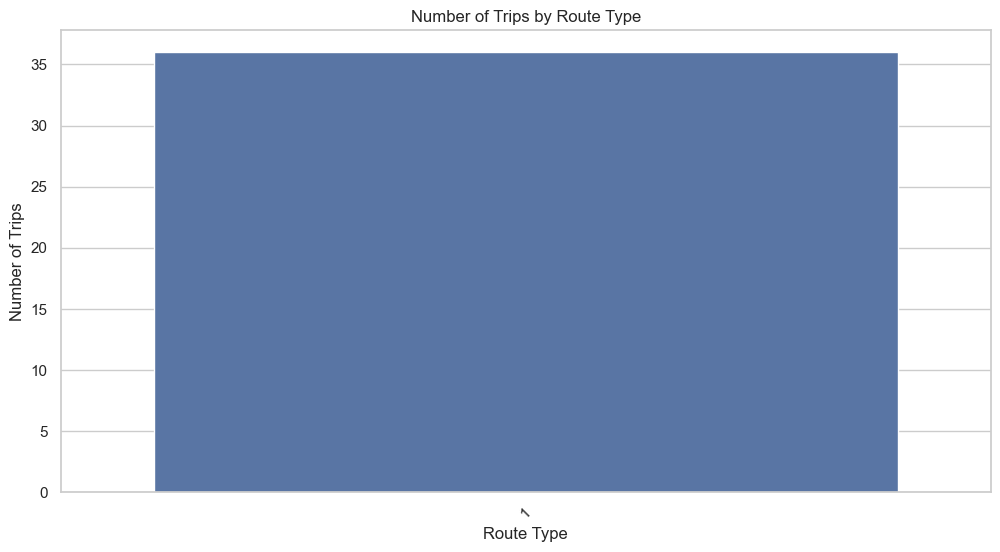

In [33]:
# Visualize the number of trips by route type
plt.figure(figsize=(12, 6))
sns.countplot(data=routes, x='route_type', order=routes['route_type'].value_counts().index)
plt.title('Number of Trips by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

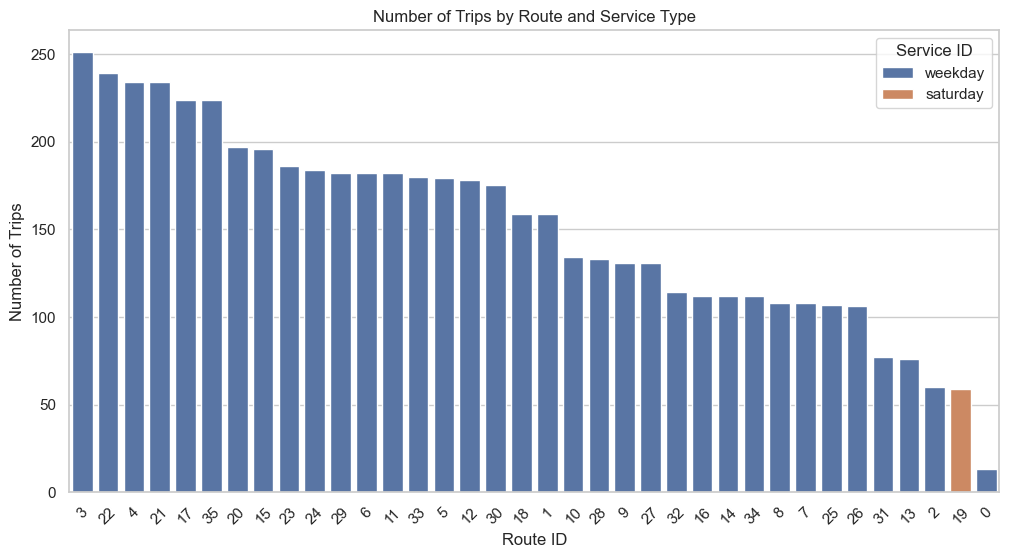

In [40]:
# Visualize the number of trips by route and service type
plt.figure(figsize=(12, 6))
sns.countplot(data=trips, x='route_id', hue='service_id', order=trips['route_id'].value_counts().index)
plt.title('Number of Trips by Route and Service Type')
plt.xlabel('Route ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(title='Service ID')
plt.show()

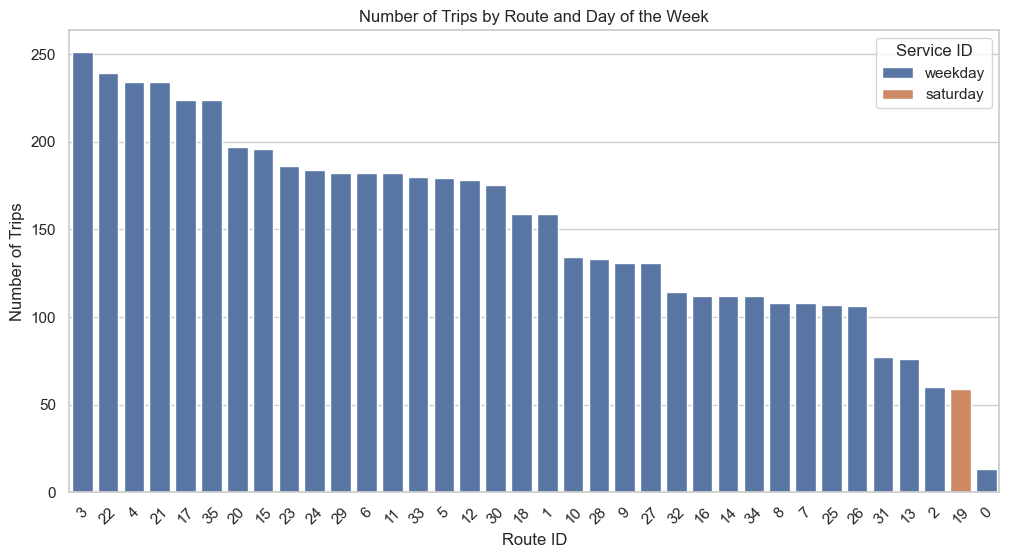

In [39]:
# Visualize the number of trips by route and day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=trips, x='route_id', hue='service_id', order=trips['route_id'].value_counts().index)
plt.title('Number of Trips by Route and Day of the Week')
plt.xlabel('Route ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(title='Service ID')
plt.show()


In [37]:
# Display the number of missing values in each DataFrame
print("Missing values in Agency:", agency.isnull().sum())
print("Missing values in Calendar:", calendar.isnull().sum())
print("Missing values in Stops:", stops.isnull().sum())
print("Missing values in Trips:", trips.isnull().sum())
print("Missing values in Stop Times:", stop_times.isnull().sum())
print("Missing values in Routes:", routes.isnull().sum())


Missing values in Agency: agency_id          0
agency_name        0
agency_url         0
agency_timezone    0
agency_lang        1
agency_phone       1
agency_fare_url    1
agency_email       1
dtype: int64
Missing values in Calendar: service_id    0
monday        0
tuesday       0
wednesday     0
thursday      0
friday        0
saturday      0
sunday        0
start_date    0
end_date      0
dtype: int64
Missing values in Stops: stop_id        0
stop_code    262
stop_name      0
stop_desc    262
stop_lat       0
stop_lon       0
dtype: int64
Missing values in Trips: route_id                    0
service_id                  0
trip_id                     0
trip_headsign            5438
trip_short_name          5438
direction_id             5438
block_id                 5438
shape_id                    0
wheelchair_accessible       0
bikes_allowed               0
dtype: int64
Missing values in Stop Times: trip_id                     0
arrival_time                0
departure_time          